# Machine Learning Techniques on NYC Taxi Traffic Data

## 1-  Importing Required Libraries

In [1]:
# Importing Required Libraries
import csv
import ast
import folium
import numpy as np
import pandas as pd
import datetime
import math

import h5py
import matplotlib.pyplot as plt
from pylab import rcParams
import scipy
#from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops
from cnn_utils import *                             # Required to run CNN model
from sklearn.model_selection import train_test_split

%matplotlib inline


c:\users\reese\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## 2- Loading and Rearranging Data

In [2]:
# Reading the CSV File (Note: Takes Some Time)
df = pd.read_csv("travel_times_2013.csv")

In [3]:
# Reversing Dataframe and Reseting Indices
df = df.iloc[::-1].reset_index()

In [4]:
# Visualizing the Dataframe
df.head()

,index,begin_node_id,end_node_id,datetime,travel_time,num_trips
0,103803578,42438173,42438849,2013-01-01 00:00:00,32.70920,10
1,103803577,2089938011,42871427,2013-01-01 00:00:00,10.29660,3
2,103803576,276318087,597237400,2013-01-01 00:00:00,27.36920,6
3,103803575,42880576,42880578,2013-01-01 00:00:00,2.63337,3
4,103803574,42487861,42471894,2013-01-01 00:00:00,11.70700,1


## 3- Dataframe Initialization

In [5]:
# Initializing NaN Dataframe

rng = pd.date_range('1/1/2013', periods=8760, freq='H')

#Splitting Strings on Whitespace to Get Dates and Times
full_dates = pd.Series(rng.format())
dates = full_dates.apply(lambda x: x.split()[0])
hours = full_dates.apply(lambda x: x.split()[1])


## Converting days to numerical values (0-6)
days = dates.apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').strftime('%w'))

# Converting Months to numerical values (1-12)
months = dates.apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').strftime('%m'))

result = pd.concat([full_dates,months,days,hours], axis= 1)

# Renaming Columns to Match Data
result.columns = ['Date', 'Month', 'Day', 'Time of Day']

# Reseting Data Indices
Initialized_DataFrame = result.reset_index()

# Dropping Extra Index Column
Initialized_DataFrame = Initialized_DataFrame.drop(['index'], axis=1)

Initialized_DataFrame


,Date,Month,Day,Time of Day
0,2013-01-01 00:00:00,01,2,00:00:00
1,2013-01-01 01:00:00,01,2,01:00:00
2,2013-01-01 02:00:00,01,2,02:00:00
3,2013-01-01 03:00:00,01,2,03:00:00
4,2013-01-01 04:00:00,01,2,04:00:00
5,2013-01-01 05:00:00,01,2,05:00:00
6,2013-01-01 06:00:00,01,2,06:00:00
7,2013-01-01 07:00:00,01,2,07:00:00
8,2013-01-01 08:00:00,01,2,08:00:00
9,2013-01-01 09:00:00,01,2,09:00:00


## 4- Defining Sample Road Network

In [6]:
# Defining Links Within Network by Begining and Ending Nodes
Begin_Nodes = [42437654,42439443,42439440,42435422,42435420,42427797,42427797,42430288,42430292,42430295,42430298,42430304,42439440,42435420,42430292,42430298]
End_Nodes = [42439443,42439440,42435422,42435420,42427805,42427805,42430288,42430292,42430295,42430298,42430304,42437654,42430295,42430288,42435422,42439443]

## 5- Visualizing the Network

In [7]:
# Defining Links
# First and Last (x,y) locations are the same so as to construct a closed network (or a loop)
longs = [-73.990619, -73.99111, -73.991563, -73.992006, -73.992463, -73.99291, -73.990067, -73.989617,
         -73.9891568, -73.988708, -73.9882578, -73.9877652, -73.9906194]
lats = [40.750997, 40.750319, 40.749706, 40.749101, 40.748469, 40.747855, 40.746659, 40.747277,
        40.7478958, 40.7485042, 40.7491155, 40.7497921, 40.7509969]

longs2 = [ -73.991563, -73.988708]
lats2 = [ 40.749706, 40.7485042]

longs3 = [-73.992463, -73.989617]
lats3 = [40.748469, 40.747277]

longs4 = [-73.989157, -73.992006]
lats4 = [40.747896, 40.749101]

longs5 = [-73.988258, -73.99111]
lats5 = [40.749116, 40.750319]

In [8]:
# Using Folium to Visualize the Network
m = folium.Map(location=[40.750997,-73.990619], zoom_start=15, tiles='Stamen Terrain') 

coordinates = zip(lats,longs)
coordinates_List = list(coordinates)
folium.PolyLine(locations=coordinates_List,weight=2.5,color = 'red').add_to(m)
folium.CircleMarker(location=[lats[0],longs[0]],weight=5, radius=5, color='red').add_to(m)
folium.CircleMarker(location=[lats[len(lats)-1],longs[len(longs)-1]],weight=5, radius=6, color='black').add_to(m)

coordinates2 = zip(lats2,longs2)
coordinates_List2 = list(coordinates2)
folium.PolyLine(locations=coordinates_List2,weight=2.5,color = 'red').add_to(m)
folium.CircleMarker(location=[lats2[0],longs2[0]],weight=5, radius=5, color='red').add_to(m)
folium.CircleMarker(location=[lats2[len(lats2)-1],longs2[len(longs2)-1]],weight=5, radius=6, color='black').add_to(m)


coordinates3 = zip(lats3,longs3)
coordinates_List3 = list(coordinates3)
folium.PolyLine(locations=coordinates_List3,weight=2.5,color = 'red').add_to(m)
folium.CircleMarker(location=[lats3[0],longs3[0]],weight=5, radius=5, color='red').add_to(m)
folium.CircleMarker(location=[lats3[len(lats3)-1],longs3[len(longs3)-1]],weight=5, radius=6, color='black').add_to(m)

coordinates4 = zip(lats4,longs4)
coordinates_List4 = list(coordinates4)
folium.PolyLine(locations=coordinates_List4,weight=2.5,color = 'red').add_to(m)
folium.CircleMarker(location=[lats4[0],longs4[0]],weight=5, radius=5, color='red').add_to(m)
folium.CircleMarker(location=[lats4[len(lats4)-1],longs4[len(longs4)-1]],weight=5, radius=6, color='black').add_to(m)


coordinates5 = zip(lats5,longs5)
coordinates_List5 = list(coordinates5)
folium.PolyLine(locations=coordinates_List5,weight=2.5,color = 'red').add_to(m)
folium.CircleMarker(location=[lats5[0],longs5[0]],weight=5, radius=5, color='red').add_to(m)
folium.CircleMarker(location=[lats5[len(lats5)-1],longs5[len(longs5)-1]],weight=5, radius=6, color='black').add_to(m)

m

## 6- Creating Convolution Matrix 

In [9]:
# Creating For Loop to Fill Travel Times for Each Segment

for i in range(len(Begin_Nodes)):
    #Checking Progress
    print('Progress = ', i)
    
    # Defining Current Link (Segment)
    current_link = df[(df.begin_node_id == Begin_Nodes[i])][(df.end_node_id == End_Nodes[i])]
    
    #Splitting Strings on Whitespace to Get Dates and Times
    full_dates = current_link['datetime']
    dates = current_link['datetime'].apply(lambda x: x.split()[0])
    
    hours = current_link['datetime'].apply(lambda x: x.split()[1])
    
    traveltimes = current_link['travel_time']
    
    ## Converting days to numerical values (0-6)
    days = dates.apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').strftime('%w'))

    # Converting Months to numerical values (1-12)
    months = dates.apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').strftime('%m'))

    #result = pd.concat([full_dates,months,days,hours,traveltimes], axis= 1)
    result = pd.concat([full_dates,traveltimes], axis= 1)

    # Renaming Columns to Match Data
    result.columns = ['Date','Segment'+ str(i+1)]

    # Reseting Data Indices
    current_link_final = result.reset_index()

    # Dropping Extra Index Column
    current_link_final = current_link_final.drop(['index'], axis=1)
    
    # Merging Travel Times of Each Segment to the Initialized DataFrame
    Initialized_DataFrame = Initialized_DataFrame.merge(current_link_final, on='Date', how='left')
    
    

 

Progress =  0


c:\users\reese\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Progress =  1
Progress =  2
Progress =  3
Progress =  4
Progress =  5
Progress =  6
Progress =  7
Progress =  8
Progress =  9
Progress =  10
Progress =  11
Progress =  12
Progress =  13
Progress =  14
Progress =  15


## 7- Interpolating Missing Values Shown as NaN

In [10]:
# Defining Helper Function
def nan_helper(y):
    """Helper to handle indices and logical indices of NaNs.

    Input:
        - y, 1d numpy array with possible NaNs
    Output:
        - nans, logical indices of NaNs
        - index, a function, with signature indices= index(logical_indices),
          to convert logical indices of NaNs to 'equivalent' indices
    Example:
        >>> # linear interpolation of NaNs
        >>> nans, x= nan_helper(y)
        >>> y[nans]= np.interp(x(nans), x(~nans), y[~nans])
    """

    return np.isnan(y), lambda z: z.nonzero()[0]

In [11]:
# For Loop to Interpolate Over All Missing Values (Linear Interpolation Function)
for i in range(16):
    y = Initialized_DataFrame["Segment"+str(i+1)]
    nans, x = nan_helper(y)
    y[nans]= np.interp(x(nans), x(~nans), y[~nans])
    Initialized_DataFrame["Segment"+str(i+1)] = y.round(2)


c:\users\reese\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [12]:
# Initialized Dataframe Visualization
Initialized_DataFrame.head()

,Date,Month,Day,Time of Day,Segment1,Segment2,Segment3,Segment4,Segment5,Segment6,Segment7,Segment8,Segment9,Segment10,Segment11,Segment12,Segment13,Segment14,Segment15,Segment16
0,2013-01-01 00:00:00,01,2,00:00:00,57.22,36.11,24.44,24.18,23.53,113.83,36.28,36.51,35.83,68.52,75.65,88.36,127.19,136.44,88.25,57.09
1,2013-01-01 01:00:00,01,2,01:00:00,43.01,27.14,18.56,16.62,18.81,104.46,17.72,17.83,17.50,14.20,15.68,66.41,115.80,136.44,89.38,89.42
2,2013-01-01 02:00:00,01,2,02:00:00,26.58,24.15,23.79,24.78,12.66,95.09,12.74,12.82,12.58,15.16,13.95,64.35,59.08,121.44,72.28,64.30
3,2013-01-01 03:00:00,01,2,03:00:00,51.44,15.65,8.92,11.15,10.85,85.72,10.92,10.99,15.53,15.60,11.96,55.15,79.39,106.43,79.32,79.36
4,2013-01-01 04:00:00,01,2,04:00:00,20.22,18.38,11.59,13.09,12.74,66.98,12.82,12.90,12.66,18.31,14.04,64.75,76.11,91.42,40.67,93.17


## 8- Data Visualization and Interpretation

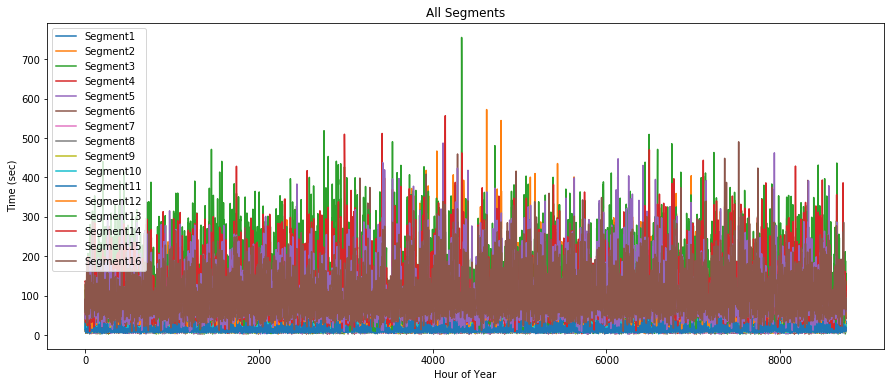

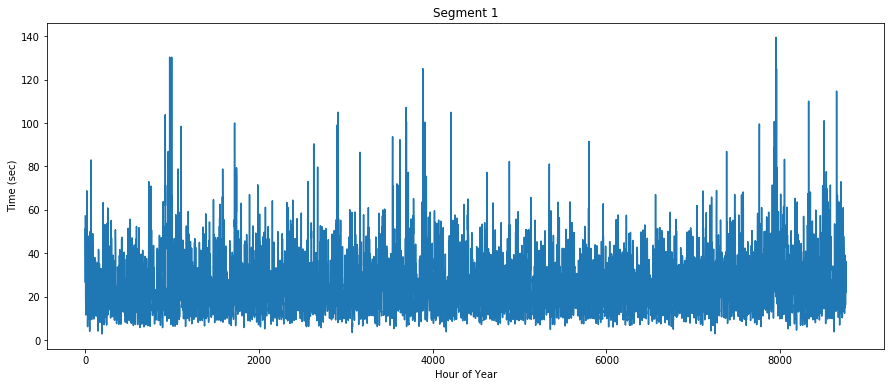

In [13]:
# Visualizing Travel Times on the Segments Through the Whole Year
rcParams['figure.figsize'] = 15, 6

Initialized_DataFrame.plot()
plt.title('All Segments')
plt.xlabel('Hour of Year')
plt.ylabel('Time (sec)')
plt.show()

Initialized_DataFrame['Segment1'].plot()
plt.title('Segment 1')
plt.xlabel('Hour of Year')
plt.ylabel('Time (sec)')
plt.show()


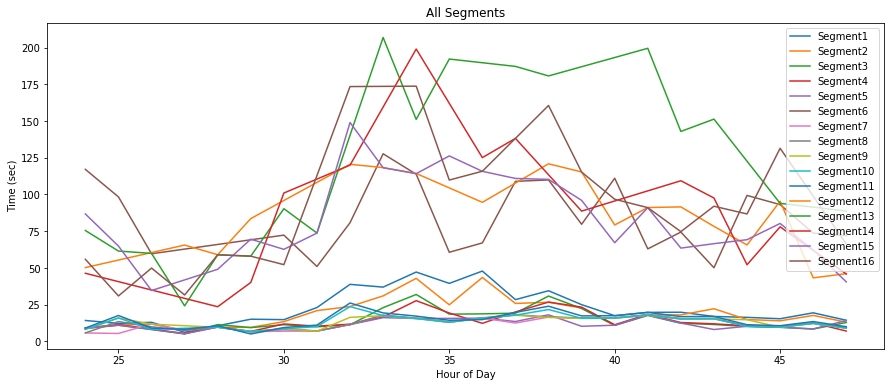

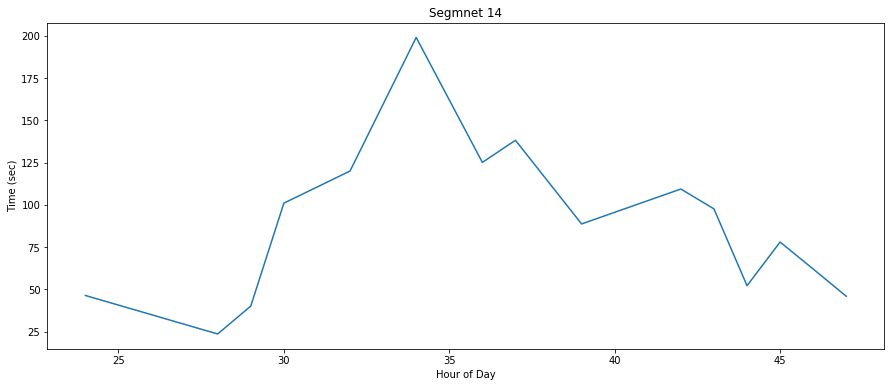

In [14]:
# Visualizing Travel times for a Random Weekday
Initialized_DataFrame[24:48].plot()
plt.title('All Segments')
plt.xlabel('Hour of Day')
plt.ylabel('Time (sec)')
plt.show()

plt.title('Segmnet 14')
plt.xlabel('Hour of Day')
plt.ylabel('Time (sec)')
Initialized_DataFrame["Segment14"][24:48].plot()


In [15]:
# Interpreting Some Information About the Data
Initialized_DataFrame.describe()

,Segment1,Segment2,Segment3,Segment4,Segment5,Segment6,Segment7,Segment8,Segment9,Segment10,Segment11,Segment12,Segment13,Segment14,Segment15,Segment16
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,24.928182,20.678850,14.666743,15.047797,11.969611,89.807879,19.061491,19.573424,19.771041,20.232525,19.977179,102.132547,151.074943,123.805916,102.098655,102.301119
std,12.841531,10.231623,7.789399,8.087514,5.300160,44.830046,15.173480,15.146728,14.593837,14.918571,15.769938,55.956188,78.242482,66.787229,61.063454,51.152451
min,2.870000,2.600000,2.560000,2.670000,2.600000,9.130000,3.210000,3.080000,3.100000,2.720000,2.860000,15.440000,9.170000,9.130000,9.160000,9.170000
25%,15.620000,13.090000,9.247500,9.720000,8.680000,60.282500,9.887500,10.080000,10.810000,10.550000,10.040000,62.910000,88.600000,73.462500,60.437500,65.927500
50%,22.220000,18.860000,13.110000,13.340000,11.050000,79.730000,13.240000,13.690000,14.720000,15.040000,14.190000,85.820000,133.320000,107.795000,81.840000,89.550000
75%,31.222500,26.492500,18.382500,18.360000,14.050000,107.382500,22.895000,24.100000,24.300000,25.722500,25.540000,127.865000,202.520000,162.310000,127.350000,128.280000
max,139.410000,136.420000,131.240000,161.620000,98.700000,459.660000,209.320000,284.610000,294.910000,271.090000,261.800000,572.520000,755.620000,556.870000,487.460000,490.500000


## 8- Creating Features and Labels for CNN Model

### DataFrame Conversion to Array

In [16]:
# Creating the Feature Images

# Transposing the DataFrame
Test_DataFrame = Initialized_DataFrame.transpose()

# Removing the "Date" Row, which is redundant at this stage
Test_DataFrame = Test_DataFrame.drop(['Date'], axis=0)

# Converting the DataFrame to a Numpy Array
Test_Array = np.array(Test_DataFrame)

# Converting First Three Rows From Strings to Integers (Everything Becomes Floats/Integers)
Test_Array[0] = Test_Array[0].astype(np.float)
Test_Array[1] = Test_Array[1].astype(np.float)

for i in range(8760):
    Test_Array[2][i] = Test_Array[2][i].split(":")[0]
    
Test_Array[2] = Test_Array[2].astype(np.float)

# Initializing the 3d Array To Include 19x6 Feature Images 
Features_Array = np.zeros((8754,19,6))
#my_array2 = []

# Filling the 3d Array with the 19x6 Feature Images
for i in range(8754):
    temp_array = Test_Array[:,i:i+6]
    Features_Array[i] = temp_array
    #my_array2.append(temp_array)




In [17]:
# Shape of Features Array
Features_Array.shape

(8754, 19, 6)

In [18]:
# Creating the Labels

# Initializing the 3d Array To Include the 19x1 Labels 
Labels_Array = np.zeros((8754,19,1))

# Filling the 3d Array with the 19x1 Label Images
for i in range(8754):
    temp_array = Test_Array[:,i+6]
    temp_array = np.reshape(temp_array, (19,1))
    #print(temp_array)
    Labels_Array[i] = temp_array

In [19]:
# Shape of Labels Array
np.shape(Labels_Array)

(8754, 19, 1)